In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import sklearn

# 데이터 로드
data = pd.read_csv('C:/Users/임진성/Desktop/LSTM_V1/your_data.csv')
data

,url,type
0,br-icloud.com.br,phishing
1,mp3raid.com/music/krizz_kaliko.html,benign
2,bopsecrets.org/rexroth/cr/1.htm,benign
3,http://www.garage-pirenne.be/index.php?option=...,defacement
4,http://adventure-nicaragua.net/index.php?optio...,defacement
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,phishing
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,phishing
651188,www.gamespot.com/xbox360/action/deadspace/,phishing
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),phishing


In [2]:
malicious_data=data
malicious_data['type'].value_counts()

type
benign        428103
defacement     96457
phishing       94111
malware        32520
Name: count, dtype: int64

In [3]:
type_mapping = {
    'malware': 3,
    'defacement': 2,
    'phishing': 1,
    'benign': 0
}
malicious_data['type'] = malicious_data['type'].map(type_mapping)
malicious_data

,url,type
0,br-icloud.com.br,1
1,mp3raid.com/music/krizz_kaliko.html,0
2,bopsecrets.org/rexroth/cr/1.htm,0
3,http://www.garage-pirenne.be/index.php?option=...,2
4,http://adventure-nicaragua.net/index.php?optio...,2
...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1
651188,www.gamespot.com/xbox360/action/deadspace/,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1


In [7]:
def get_url_len(url):
    return len(url)
get_url_len('mp3raid.com/music/krizz_kaliko.html')

malicious_data['url_length'] = malicious_data['url'].str.len()
malicious_data.head()

,url,type,url_length
0,br-icloud.com.br,1,16
1,mp3raid.com/music/krizz_kaliko.html,0,35
2,bopsecrets.org/rexroth/cr/1.htm,0,31
3,http://www.garage-pirenne.be/index.php?option=...,2,88
4,http://adventure-nicaragua.net/index.php?optio...,2,235


In [9]:
def extract_domain_length(url):
    try:
        # Add 'http://' if no scheme is present
        if not url.startswith(('http://', 'https://')):
            url = 'http://' + url
        
        parsed_url = urlparse(url)
        domain = parsed_url.netloc
        
        # Return the length of the domain
        return len(domain) if domain else 0
    
    except Exception as e:
        return 0 

extract_domain_length('br-icloud.com.br')

0

In [11]:
malicious_data['domain_length'] = malicious_data['url'].apply(extract_domain_length)

malicious_data

,url,type,url_length,domain_length
0,br-icloud.com.br,1,16,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0
...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0


In [13]:
import re

def count_special_chars(url):
    non_alpha_num = re.findall(r'\W',url)
    return len(non_alpha_num)

malicious_data['special_chars_count'] = malicious_data['url'].apply(count_special_chars)
malicious_data

,url,type,url_length,domain_length,special_chars_count
0,br-icloud.com.br,1,16,0,3
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13
...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6


In [15]:
from urllib.parse import urlparse
import ipaddress

def has_ip_address(url):
    try:
        parsed_url = urlparse(url)
        if parsed_url.hostname:
            ip = ipaddress.ip_address(parsed_url.hostname)
            return isinstance(ip, (ipaddress.IPv4Address, ipaddress.IPv6Address))
    except ValueError:
        pass  
    return 0

malicious_data['has_ip'] = malicious_data['url'].apply(has_ip_address)
malicious_data['has_ip'] = malicious_data['has_ip'].astype(int)
malicious_data['has_ip'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 651191 entries, 0 to 651190
Series name: has_ip
Non-Null Count   Dtype
--------------   -----
651191 non-null  int32
dtypes: int32(1)
memory usage: 2.5 MB


In [17]:
from urllib.parse import urlparse

def is_shortened_url(url):
    # 축약 URL 서비스의 정확한 도메인 리스트
    shortened_services = {
        "bit.ly", "tinyurl.com", "goo.gl", "t.co", "ow.ly", "buff.ly", 
        "is.gd", "adf.ly", "bit.do", "cutt.ly", "v.gd", "shorte.st", 
        "bl.ink", "x.co", "s.id", "trib.al"
    }
    
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc.lower()

    # 정확히 도메인과 일치하는 경우에만 1 반환
    return 1 if netloc in shortened_services else 0

malicious_data['shortened'] = malicious_data['url'].apply(is_shortened_url)
malicious_data[malicious_data['shortened'] == 1]

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened
93007,http://bit.ly/R1Y0kU?2000.Ford.F250.Lariat/130...,1,105,0,14,0,1
128002,http://bit.ly/M77GIA?ferias=93840923804983,1,42,0,7,0,1
448721,http://bit.ly/X0QmNx?2007.Subaru.Impreza.WRX/1...,1,107,0,14,0,1
520404,https://bit.ly/contentfrb,1,25,0,5,0,1
521022,https://is.gd/E1h2RX&data=02%7C01%7C%7C5dd177b...,1,386,0,41,0,1
...,...,...,...,...,...,...,...
533664,https://buff.ly/2KeguEo,1,23,0,5,0,1
534411,http://t.co/ZXCtb9xgsu,1,22,0,5,0,1
534534,https://tinyurl.com/upgrate-email,1,33,0,6,0,1
534668,https://tinyurl.com/sdi-template,1,32,0,6,0,1


In [19]:
def count_keyword_flags(url):
    # 찾고자 하는 키워드 목록
    keywords = [
        "php", "index", "option", "article", "content", 
        "id", "html", "tmpl", "view", "component"
    ]
    
    # URL을 소문자로 변환
    url_lower = url.lower()
    
    # 각 키워드가 포함되어 있는지 여부를 1 또는 0으로 반환
    return {keyword: (1 if keyword in url_lower else 0) for keyword in keywords}

# 각 URL에 대해 키워드 포함 여부를 데이터프레임으로 변환
keyword_flags_df = malicious_data['url'].apply(count_keyword_flags).apply(pd.Series)

# 기존 데이터프레임에 키워드 포함 여부 데이터프레임을 병합
malicious_data = pd.concat([malicious_data, keyword_flags_df], axis=1)

# 결과 출력
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,article,content,id,html,tmpl,view,component
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,0,0,1,1,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,0,0,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,1,1,1,0,0,1,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,0,0,0,1,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,0,0,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,0,0,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,0,0,1,0,0,0,0


In [20]:
import string
def count_letters(url):
    num_letters = sum(char.isalpha() for char in url)
    return num_letters

def count_digits(url):
    num_digits = sum(char.isdigit() for char in url)
    return num_digits

In [21]:
malicious_data['letters_count'] = malicious_data['url'].apply(lambda x: count_letters(x))
malicious_data['digits_count'] = malicious_data['url'].apply(lambda x: count_digits(x))
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,article,content,id,html,tmpl,view,component,letters_count,digits_count
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,0,0,0,0,0,0,0,13,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,0,0,1,1,0,0,0,29,1
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,0,0,0,0,0,0,0,25,1
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,1,1,1,0,0,1,0,63,7
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,0,0,0,0,1,0,1,199,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,0,0,0,1,0,0,0,21,12
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,0,0,0,0,0,0,0,29,7
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,0,0,0,0,0,0,0,33,3
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,0,0,1,0,0,0,0,36,0


In [22]:
def check_https(url):
    # URL이 https로 시작하면 True, 아니면 False
    return 1 if url.startswith('https://') else 0

# https 적용 여부를 새로운 열로 추가
malicious_data['https_flag'] = malicious_data['url'].apply(lambda x: check_https(x))

# 결과 확인
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,article,content,id,html,tmpl,view,component,letters_count,digits_count,https_flag
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,0,0,0,0,0,0,0,13,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,0,0,1,1,0,0,0,29,1,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,0,0,0,0,0,0,0,25,1,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,1,1,1,0,0,1,0,63,7,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,0,0,0,0,1,0,1,199,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,0,0,0,1,0,0,0,21,12,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,0,0,0,0,0,0,0,29,7,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,0,0,0,0,0,0,0,33,3,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,0,0,1,0,0,0,0,36,0,0


In [23]:
def count_slash(url):
    # '/'의 개수 계산
    return url.count('/')

def count_hyphen(url):
    # '-'의 개수 계산
    return url.count('-')

def count_underscore(url):
    # '_'의 개수 계산
    return url.count('_')

def count_dot(url):
    # '.'의 개수 계산
    return url.count('.')

def count_equals(url):
    # '='의 개수 계산
    return url.count('=')

def count_question(url):
    # '_'의 개수 계산
    return url.count('?')

def count_at(url):
    # '/'의 개수 계산
    return url.count('@')

def count_percent(url):
    # '%'의 개수 계산
    return url.count('%')

malicious_data['slash_count'] = malicious_data['url'].apply(lambda x: count_slash(x))
malicious_data['hyphen_count'] = malicious_data['url'].apply(lambda x: count_hyphen(x))
malicious_data['underscore_count'] = malicious_data['url'].apply(lambda x: count_underscore(x))
malicious_data['dot_count'] = malicious_data['url'].apply(lambda x: count_dot(x))
malicious_data['equals_count'] = malicious_data['url'].apply(lambda x: count_equals(x))
malicious_data['question_count'] = malicious_data['url'].apply(lambda x: count_question(x))
malicious_data['at_count'] = malicious_data['url'].apply(lambda x: count_at(x))
malicious_data['percent_count'] = malicious_data['url'].apply(lambda x: count_percent(x))

# 결과 확인
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,digits_count,https_flag,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,at_count,percent_count
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,...,1,0,2,0,1,2,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,...,1,0,3,0,0,2,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,...,7,0,3,1,2,3,4,1,0,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,...,22,0,3,1,1,2,3,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,...,12,0,3,0,0,3,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,...,7,0,4,2,0,2,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,...,3,0,4,0,0,2,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,...,0,0,2,0,3,2,0,0,0,0


In [24]:
from urllib.parse import urlparse, parse_qs

def count_url_parameters(url):
    # Parse the URL using urlparse
    parsed_url = urlparse(url)
    
    # Extract the query part of the URL
    query = parsed_url.query
    
    # Parse the query parameters using parse_qs
    parameters = parse_qs(query)
    
    # Return the number of parameters
    return len(parameters)

malicious_data['param_count'] = malicious_data['url'].apply(count_url_parameters)
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,https_flag,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,at_count,percent_count,param_count
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,...,0,0,1,0,2,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,...,0,2,0,1,2,0,0,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,...,0,3,0,0,2,0,0,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,...,0,3,1,2,3,4,1,0,0,4
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,...,0,3,1,1,2,3,1,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,...,0,3,0,0,3,0,0,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,...,0,4,2,0,2,0,0,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,...,0,4,0,0,2,0,0,0,0,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,...,0,2,0,3,2,0,0,0,0,0


In [25]:
tld_list = [
    '.tk', '.buzz', '.xyz', '.top', '.ga', '.ml', '.info', '.cf', '.gq', '.icu', '.wang', '.live', '.host', '.shop' , '.top', '.icu', '.vip', '.id', '.cc', '.br', '.ci', '.zw', '.sx', '.mw'
]

def check_mal_tld(url):
    parsed_url = urlparse(url)
    netloc = parsed_url.netloc.lower()

    if any(netloc.endswith(tld) for tld in tld_list):
        return 1
    return 0

url = "http://example.xyz/path"
print(check_mal_tld(url))

malicious_data['mal_tld'] = malicious_data['url'].apply(check_mal_tld)
malicious_data[malicious_data['mal_tld'] == 1]

1


,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,slash_count,hyphen_count,underscore_count,dot_count,equals_count,question_count,at_count,percent_count,param_count,mal_tld
60,http://www.approvi.com.br/ck.htm,2,32,0,8,0,0,0,0,0,...,3,0,0,4,0,0,0,0,0,1
65,http://www.juventudelirica.com.br/index.html,2,44,0,8,0,0,0,1,0,...,3,0,0,4,0,0,0,0,0,1
99,http://www.viamanaus.com.br/index.php?option=c...,2,80,0,14,0,0,1,1,1,...,3,0,1,4,3,1,0,0,3,1
115,http://9779.info/%E5%84%BF%E7%AB%A5%E7%AB%8B%E...,3,81,0,27,0,0,0,0,0,...,4,0,0,1,0,0,0,21,0,1
130,http://correios.com.br/para-sua-empresa/comuni...,0,136,0,20,0,0,0,0,0,...,7,10,0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
553939,http://fb-recovery-10000076733-it.tk/update_se...,3,56,0,9,0,0,0,0,0,...,3,3,1,2,0,0,0,0,0,1
554279,http://chatmusic.xyz/a3b87a035d656b088bf84f818...,3,60,0,7,0,0,0,0,0,...,4,0,0,2,0,0,0,0,0,1
554280,http://castmart.ga/~zadmin/icloud/gold_encrypt...,3,60,0,9,0,0,0,0,0,...,5,0,2,2,0,0,0,0,0,1
554998,http://tokyomangass.host/ticket.exe,3,35,0,6,0,0,0,0,0,...,3,0,0,2,0,0,0,0,0,1


In [26]:
from urllib.parse import urlparse
def no_of_dir(url):
    urldir = urlparse(url).path
    return urldir.count('/')

malicious_data['count_dir'] = malicious_data['url'].apply(lambda i: no_of_dir(i))
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,hyphen_count,underscore_count,dot_count,equals_count,question_count,at_count,percent_count,param_count,mal_tld,count_dir
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,...,1,0,2,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,...,0,1,2,0,0,0,0,0,0,2
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,3
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,...,1,2,3,4,1,0,0,4,0,1
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,...,1,1,2,3,1,0,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,...,0,0,3,0,0,0,0,0,0,3
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,...,2,0,2,0,0,0,0,0,0,4
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,4
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,...,0,3,2,0,0,0,0,0,0,2


In [ ]:
from urllib.parse import urlparse
def abnormal_url(url):
    hostname = urlparse(url).hostname
    hostname = str(hostname)
    match = re.search(hostname, url)
    if match:
        # print match.group()
        return 1
    else:
        # print 'No matching pattern found'
        return 0


malicious_data['abnormal_url'] = malicious_data['url'].apply(lambda i: abnormal_url(i))
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,underscore_count,dot_count,equals_count,question_count,at_count,percent_count,param_count,mal_tld,count_dir,abnormal_url
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,...,1,2,0,0,0,0,0,0,2,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,...,0,2,0,0,0,0,0,0,3,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,...,2,3,4,1,0,0,4,0,1,1
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,...,1,2,3,1,0,0,3,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,...,0,3,0,0,0,0,0,0,3,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,...,0,2,0,0,0,0,0,0,4,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,...,0,2,0,0,0,0,0,0,4,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,...,3,2,0,0,0,0,0,0,2,0


In [28]:
malicious_data['count-www'] = malicious_data['url'].apply(lambda i: i.count('www'))
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,dot_count,equals_count,question_count,at_count,percent_count,param_count,mal_tld,count_dir,abnormal_url,count-www
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,...,2,0,0,0,0,0,0,2,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,...,2,0,0,0,0,0,0,3,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,...,3,4,1,0,0,4,0,1,1,1
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,...,2,3,1,0,0,3,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,...,3,0,0,0,0,0,0,3,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,...,2,0,0,0,0,0,0,4,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,...,2,0,0,0,0,0,0,4,0,1
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,...,2,0,0,0,0,0,0,2,0,0


In [29]:
def suspicious_words(url):
    match = re.search('PayPal|login|signin|bank|account|update|free|lucky|service|bonus|ebayisapi|webscr',
                      url)
    if match:
        return 1
    else:
        return 0

malicious_data['sus_url'] = malicious_data['url'].apply(lambda i: suspicious_words(i))
malicious_data

,url,type,url_length,domain_length,special_chars_count,has_ip,shortened,php,index,option,...,equals_count,question_count,at_count,percent_count,param_count,mal_tld,count_dir,abnormal_url,count-www,sus_url
0,br-icloud.com.br,1,16,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,mp3raid.com/music/krizz_kaliko.html,0,35,0,4,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2,bopsecrets.org/rexroth/cr/1.htm,0,31,0,5,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
3,http://www.garage-pirenne.be/index.php?option=...,2,88,0,16,0,0,1,1,1,...,4,1,0,0,4,0,1,1,1,0
4,http://adventure-nicaragua.net/index.php?optio...,2,235,0,13,0,0,1,1,1,...,3,1,0,0,3,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651186,xbox360.ign.com/objects/850/850402.html,1,39,0,6,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,0
651187,games.teamxbox.com/xbox-360/1860/Dead-Space/,1,44,0,8,0,0,0,0,0,...,0,0,0,0,0,0,4,0,0,0
651188,www.gamespot.com/xbox360/action/deadspace/,1,42,0,6,0,0,0,0,0,...,0,0,0,0,0,0,4,0,1,0
651189,en.wikipedia.org/wiki/Dead_Space_(video_game),1,45,0,6,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0


In [30]:
# 전체 데이터에서 학습(60%) 및 나머지(40%) 나누기
train_data, temp_data = train_test_split(malicious_data, test_size=0.4, random_state=42, stratify=data['type'])

# 나머지 데이터(40%)에서 검증(20%) 및 테스트(20%) 나누기
val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42, stratify=temp_data['type'])

# 결과 확인
print("학습 데이터 크기:", len(train_data))
print("검증 데이터 크기:", len(val_data))
print("테스트 데이터 크기:", len(test_data))

학습 데이터 크기: 390714
검증 데이터 크기: 130238
테스트 데이터 크기: 130239


In [31]:
import numpy as np

trainx = train_data.drop(columns = {'type', 'url' })

x_train = trainx.iloc[:, :].values
print(x_train)
print(x_train.shape)

y_train = np.array(train_data['type'])
y_train = y_train.reshape(-1, 1)
print(y_train)
print(y_train.shape[0])

[[ 39   0   3 ...   0   0   0]
 [ 29   0   6 ...   0   1   0]
 [108   0  19 ...   1   1   0]
 ...
 [ 36   0   4 ...   0   0   0]
 [175   0  29 ...   1   1   0]
 [ 33   0   4 ...   0   1   0]]
(390714, 32)
[[0]
 [1]
 [2]
 ...
 [0]
 [2]
 [1]]
390714


In [32]:
valx = val_data.drop(columns = {'type', 'url'})

x_val = valx.iloc[:, :].values
print(x_val)
print(x_val.shape)

y_val = np.array(val_data['type'])
y_val = y_val.reshape(-1, 1)
print(y_val)
print(y_val.shape[0])

[[ 59   0   9 ...   0   0   0]
 [ 33   0   5 ...   0   0   0]
 [306   0  15 ...   0   0   1]
 ...
 [ 33   0   6 ...   0   0   1]
 [ 15   0   1 ...   0   0   0]
 [ 71   0   8 ...   0   0   0]]
(130238, 32)
[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [0]]
130238


In [33]:
testx = test_data.drop(columns = {'type', 'url'})

x_test = testx.iloc[:, :].values
print(x_test)
print(x_test.shape)

y_test = np.array(test_data['type'])
y_test = y_test.reshape(-1, 1)
print(y_test)
print(y_test.shape[0])

[[ 50   0   6 ...   0   0   1]
 [ 29   0   5 ...   0   0   0]
 [ 27   0   3 ...   0   0   0]
 ...
 [120   0  19 ...   0   0   0]
 [ 10   0   2 ...   0   0   0]
 [ 26   0   5 ...   0   0   0]]
(130239, 32)
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
130239


In [34]:
print(malicious_data.shape)

(651191, 34)


In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense  # 필요한 경우 Dense 층도 함께 임포트


model = Sequential([
    Dense(units = 64, activation = 'relu', input_shape=(32,)),
    Dense(units = 32, activation = 'relu'),
    Dense(units = 4, activation = 'softmax')
])

In [36]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [37]:
history = model.fit(x_train, y_train, epochs = 20,batch_size=128, validation_data=(x_val, y_val))

Epoch 1/20
3053/3053 [==============================] - 11s 3ms/step - loss: 0.3778 - accuracy: 0.8655 - val_loss: 0.2962 - val_accuracy: 0.9037
Epoch 2/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.2620 - accuracy: 0.9171 - val_loss: 0.2348 - val_accuracy: 0.9253
Epoch 3/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.2263 - accuracy: 0.9280 - val_loss: 0.2159 - val_accuracy: 0.9303
Epoch 4/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.2110 - accuracy: 0.9321 - val_loss: 0.2039 - val_accuracy: 0.9352
Epoch 5/20
3053/3053 [==============================] - 12s 4ms/step - loss: 0.2004 - accuracy: 0.9354 - val_loss: 0.1980 - val_accuracy: 0.9374
Epoch 6/20
3053/3053 [==============================] - 13s 4ms/step - loss: 0.1911 - accuracy: 0.9381 - val_loss: 0.1839 - val_accuracy: 0.9399
Epoch 7/20
3053/3053 [==============================] - 12s 4ms/step - loss: 0.1846 - accuracy: 0.9402 - val_loss: 0.1801 - val_ac

In [57]:
# 테스트 데이터 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

4070/4070 [==============================] - 10s 3ms/step - loss: 0.1555 - accuracy: 0.9499
Test Loss: 0.1555119752883911
Test Accuracy: 0.9498997926712036


In [123]:
# x_val의 배열 순서에 맞는 열 이름을 추출
x_val_column_names = list(malicious_data.columns)

# 열 이름 출력
print("x_val 배열의 열 이름 (순서대로):")
for idx, name in enumerate(x_val_column_names):
    print(f"Feature_{idx}: {name}")


x_val 배열의 열 이름 (순서대로):
Feature_0: url
Feature_1: type
Feature_2: url_length
Feature_3: domain_length
Feature_4: special_chars_count
Feature_5: has_ip
Feature_6: shortened
Feature_7: php
Feature_8: index
Feature_9: option
Feature_10: article
Feature_11: content
Feature_12: id
Feature_13: html
Feature_14: tmpl
Feature_15: view
Feature_16: component
Feature_17: letters_count
Feature_18: digits_count
Feature_19: https_flag
Feature_20: slash_count
Feature_21: hyphen_count
Feature_22: dot_count
Feature_23: equals_count
Feature_24: question_count
Feature_25: at_count
Feature_26: percent_count
Feature_27: underscore_count
Feature_28: param_count
Feature_29: mal_tld
Feature_30: count_dir
Feature_31: abnormal_url
Feature_32: count-www
Feature_33: sus_url


Starting model training...
Model training completed.
Calculating Permutation Importance...


Permutation Repeats: 100%|███████████████████████████████████████████████████████████████| 3/3 [00:14<00:00,  4.90s/it]


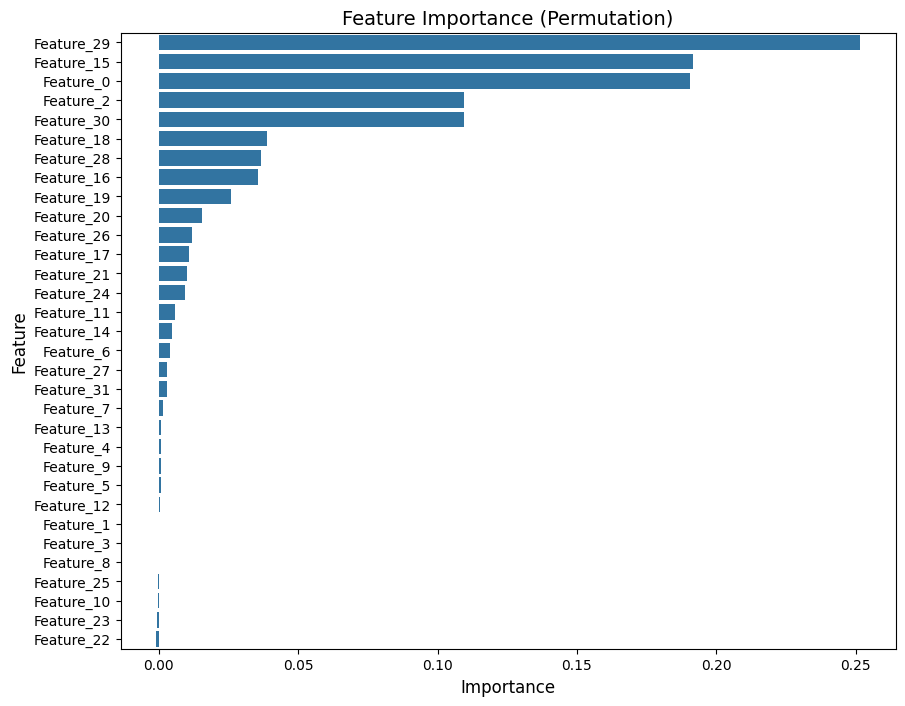

In [151]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import resample
from tqdm import tqdm

# Keras 모델 생성 함수 정의
def create_model():
    model = Sequential([
        Dense(units=64, activation='relu', input_dim=32),  # input_shape -> input_dim for Sci-Keras
        Dense(units=32, activation='relu'),
        Dense(units=4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Sci-Keras KerasClassifier 사용
sklearn_model = KerasClassifier(model=create_model, epochs=5, batch_size=128, verbose=0)

# 모델 학습
print("Starting model training...")
sklearn_model.fit(x_train, y_train)
print("Model training completed.")

# Validation 데이터 샘플링
x_val_small, y_val_small = resample(x_val, y_val, n_samples=1000, random_state=42)

# Permutation Importance 진행 상황 표시
print("Calculating Permutation Importance...")
results = {}
for i in tqdm(range(3), desc="Permutation Repeats"):
    results = permutation_importance(
        estimator=sklearn_model,
        X=x_val_small,
        y=y_val_small,
        scoring='accuracy',
        n_repeats=3,
        random_state=42
    )

# Feature 중요도 저장
feature_importance = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(x_val.shape[1])],
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

# 상위 Feature 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance, orient='h')
plt.title('Feature Importance (Permutation)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


Starting model training...
Model training completed.
Calculating Permutation Importance...


Permutation Iterations: 100%|██████████████████████████████████████████████████████████| 10/10 [00:49<00:00,  4.95s/it]


Average Feature Importance over 10 iterations:
       Feature  Average Importance
29  Feature_29            0.253600
0    Feature_0            0.231933
15  Feature_15            0.128933
30  Feature_30            0.113933
2    Feature_2            0.104667
18  Feature_18            0.083433
16  Feature_16            0.071367
28  Feature_28            0.051100
21  Feature_21            0.016100
19  Feature_19            0.015433
24  Feature_24            0.014933
17  Feature_17            0.011000
20  Feature_20            0.010400
26  Feature_26            0.008433
11  Feature_11            0.008000
25  Feature_25            0.007733
14  Feature_14            0.005967
31  Feature_31            0.004833
5    Feature_5            0.004433
13  Feature_13            0.003900
27  Feature_27            0.002300
7    Feature_7            0.001567
6    Feature_6            0.001467
22  Feature_22            0.001467
8    Feature_8            0.001200
4    Feature_4            0.001167
23  Feat

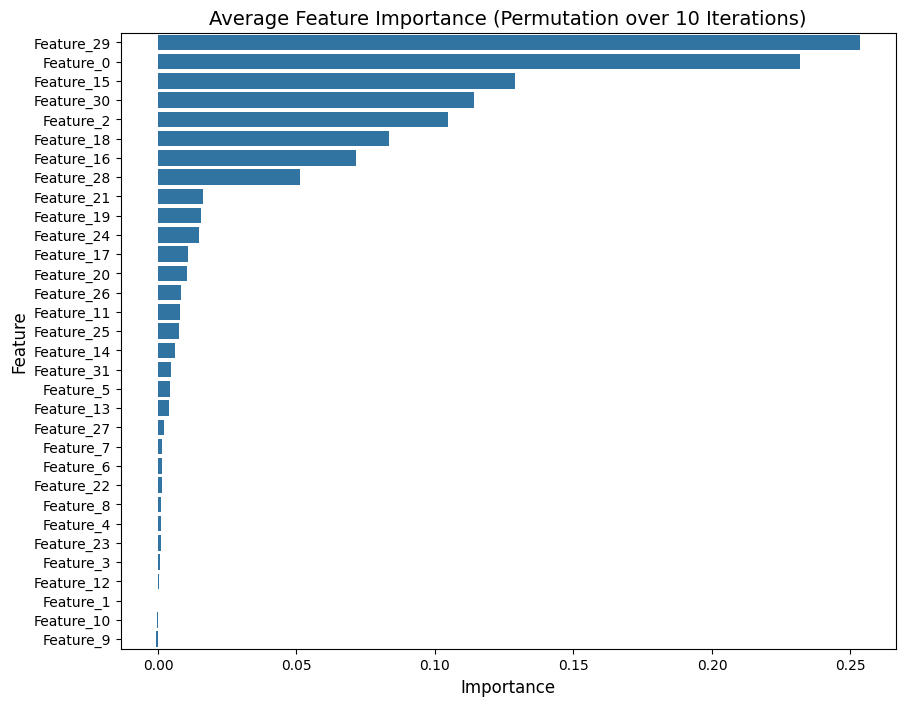

In [155]:
from scikeras.wrappers import KerasClassifier
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.utils import resample
from tqdm import tqdm

# Keras 모델 생성 함수 정의
def create_model():
    model = Sequential([
        Dense(units=64, activation='relu', input_dim=32),  # input_shape -> input_dim for Sci-Keras
        Dense(units=32, activation='relu'),
        Dense(units=4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# Sci-Keras KerasClassifier 사용
sklearn_model = KerasClassifier(model=create_model, epochs=5, batch_size=128, verbose=0)

# 모델 학습
print("Starting model training...")
sklearn_model.fit(x_train, y_train)
print("Model training completed.")

# Validation 데이터 샘플링
x_val_small, y_val_small = resample(x_val, y_val, n_samples=1000, random_state=42)

# Permutation Importance 반복 수행
num_iterations = 10  # Permutation Importance를 10번 수행
all_importances = []

print("Calculating Permutation Importance...")
for i in tqdm(range(num_iterations), desc="Permutation Iterations"):
    results = permutation_importance(
        estimator=sklearn_model,
        X=x_val_small,
        y=y_val_small,
        scoring='accuracy',
        n_repeats=3,
        random_state=i  # 각 반복마다 다른 random_state를 사용
    )
    all_importances.append(results.importances_mean)

# 평균 중요도 계산
average_importances = np.mean(all_importances, axis=0)

# Feature 중요도 저장
feature_importance = pd.DataFrame({
    'Feature': [f'Feature_{i}' for i in range(x_val.shape[1])],
    'Average Importance': average_importances
}).sort_values(by='Average Importance', ascending=False)

# 중요도 결과 출력
print("Average Feature Importance over 10 iterations:")
print(feature_importance)

# 상위 Feature 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Average Importance', y='Feature', data=feature_importance, orient='h')
plt.title('Average Feature Importance (Permutation over 10 Iterations)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [295]:
print(type(x_val))  # Pandas DataFrame이면 <class 'pandas.DataFrame'>
head().malicious_data

<class 'numpy.ndarray'>


In [65]:
import pandas as pd

# CSV 파일에서 컬럼 이름 읽기
df = malicious_data
feature_names = df.columns.drop(['url', 'type'])  # 'url'과 'type' 제거

# Numpy 배열을 DataFrame으로 변환
x_val = pd.DataFrame(x_val, columns=feature_names)

In [71]:
feature_names = [
    'url_length', 'domain_length', 'special_chars_count', 'has_ip', 'shortened', 
    'letters_count', 'digits_count', 'https_flag', 'slash_count', 'hyphen_count', 
    'underscore_count', 'dot_count', 'equals_count', 'question_count', 'at_count', 
    'percent_count', 'param_count', 'mal_tld', 'php', 'index', 'option', 'article', 
    'content', 'id', 'html', 'tmpl', 'view', 'component', 'count_dir', 'abnormal_url', 
    'count-www', 'sus_url'
]

# Numpy 배열을 DataFrame으로 변환
x_val = pd.DataFrame(x_val, columns=feature_names)


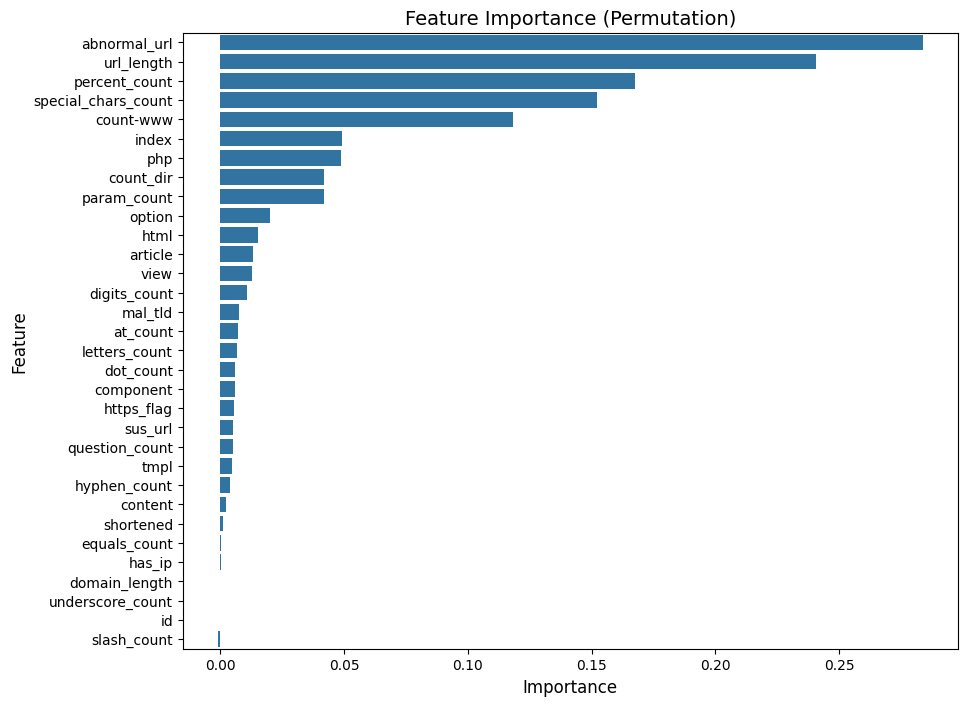

In [101]:
# Permutation Importance 결과를 DataFrame으로 변환
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': results.importances_mean
}).sort_values(by='Importance', ascending=False)

# 상위 20개 Feature 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(32), orient='h')
plt.title('Feature Importance (Permutation)', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.show()


In [1]:
from tensorflow.python.framework.convert_to_constants import convert_variables_to_constants_v2
import tensorflow as tf

def calculate_flops(model):
    # 모델 변환
    frozen_func = convert_variables_to_constants_v2(tf.function(model).get_concrete_function(
        tf.TensorSpec([1] + list(model.input_shape[1:]), tf.float32)))
    graph_def = frozen_func.graph.as_graph_def()

    # FLOPs 계산
    with tf.compat.v1.Session() as sess:
        flops = tf.compat.v1.profiler.profile(
            sess.graph,
            options=tf.compat.v1.profiler.ProfileOptionBuilder.float_operation())
        return flops.total_float_ops
print(f"Model FLOPs: {calculate_flops(model)}")


NameError: name 'model' is not defined